In [1]:
#week3.2

In [56]:
#import necessary libraries
#pandas for dataset management
import pandas as pd
#sklearn for models
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#matplotlib and seaborn for plots
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
#Create the synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [60]:
#view the dataset
# Display basic information
print(f"Feature matrix shape: {X.shape}")
print(f"Target array shape: {y.shape}")

Feature matrix shape: (1000, 20)
Target array shape: (1000,)


In [62]:
# Display the first 5 samples
print("First 5 samples of the feature matrix:")
print(X[:5])

print("\nFirst 5 samples of the target array:")
print(y[:5])

First 5 samples of the feature matrix:
[[-0.20245394  0.75116708 -1.5118818   0.2137688   1.63015193  1.34647956
   0.509842   -1.05353325 -1.08166076  0.68178104  0.71436747  0.2554845
  -0.96778385  1.20120874  0.87039209 -1.41245885  1.6194294  -1.56978108
   0.6370882  -0.46505859]
 [-0.2933976  -0.4618495  -1.03503817 -1.43874527 -0.47525527  0.90796918
   0.06052072 -0.76490424 -0.69115768  0.24284969  0.80836386 -0.10173398
  -1.30047378  0.50115639  0.37074947 -1.77831813  1.3439882  -1.36749482
   0.77655426 -0.30663438]
 [-0.23353927  1.59413738 -0.24302373 -0.52131643 -1.40525766  0.9104224
   0.17020455 -0.74590929 -0.70780798  0.32736049  0.68426187  0.00392919
  -1.81944884  0.25331391  0.45532978  0.29779904  1.25020752 -1.25174607
   0.64451726  0.74205658]
 [-0.4493544   0.45729798  0.33386276 -0.82325139  1.42893059  0.71316747
  -0.34774896 -0.67681312 -0.48951717 -0.11190447  1.09072902 -0.46226316
   0.8682005  -1.06063319 -0.01044881 -0.5110327   1.40722328 -1.505

In [64]:
#seems like a bunch of random mumbo jumbo|

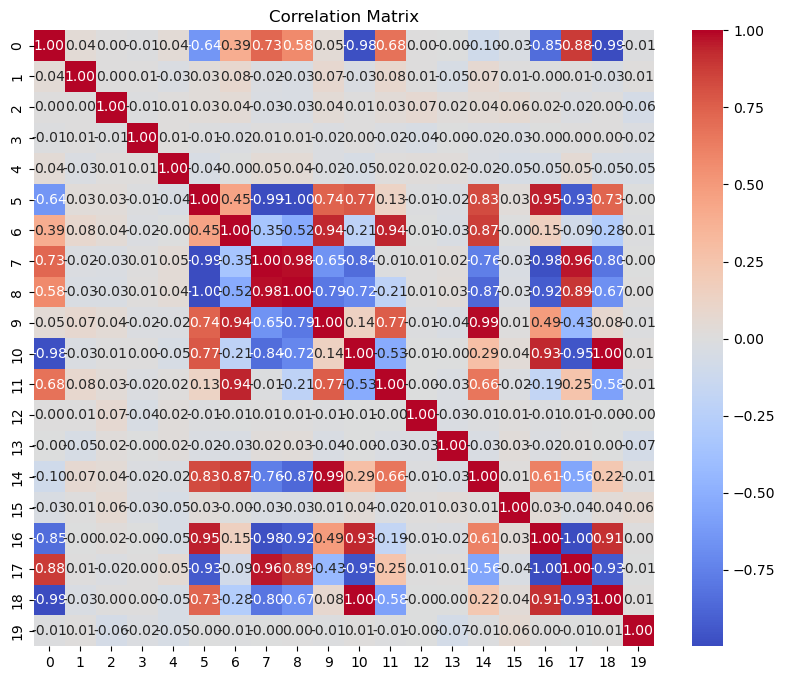

In [66]:
import numpy as np

# Compute the correlation matrix
correlation_matrix = np.corrcoef(X, rowvar=False)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [70]:
#idk what that was useful for here, but it looks cool

In [72]:
#use Polynomial Features to create a function
poly = PolynomialFeatures(degree=2, include_bias=False)  
#fit and transform the model to X
X_poly = poly.fit_transform(X)
#added both polynomial features and interaction terms

In [74]:
#print the result
print(X_poly)

[[-2.02453941e-01  7.51167079e-01 -1.51188180e+00 ...  4.05881371e-01
  -2.96283340e-01  2.16279495e-01]
 [-2.93397603e-01 -4.61849505e-01 -1.03503817e+00 ...  6.03036514e-01
  -2.38118234e-01  9.40246434e-02]
 [-2.33539268e-01  1.59413738e+00 -2.43023732e-01 ...  4.15402504e-01
   4.78268277e-01  5.50647967e-01]
 ...
 [-7.52810674e-01  3.85515808e-01 -6.80635732e-01 ...  3.54813567e+00
   4.91172721e+00  6.79936349e+00]
 [-1.99836418e-01  4.04068105e-01  1.31092200e-01 ...  3.42740700e-01
  -4.47475452e-01  5.84215064e-01]
 [-1.93880765e-02 -2.10390849e+00 -7.33558573e-01 ...  8.06355607e-04
   1.13688958e-02  1.60291304e-01]]


In [76]:
# Split the unoptimized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

In [78]:
#Using RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)

In [80]:
# Now Train the Logistic Regression model on the default features
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
# Predict on the default test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [84]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Non-Feature Selected Model")
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Non-Feature Selected Model
Model Accuracy: 0.9966666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      0.67      0.80         3

    accuracy                           1.00       300
   macro avg       1.00      0.83      0.90       300
weighted avg       1.00      1.00      1.00       300

ROC AUC Score: 0.9921436588103255


In [86]:
#using wrapper methods since they consider interction features as well

In [88]:
#Select top 10 features
rfe = RFE(model, n_features_to_select=5) 
#fit and transform the model training and test sets separately
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [89]:
# Display selected feature indices
selected_indices_rfe = rfe.get_support(indices=True)
selected_features_rfe = poly.get_feature_names_out()[selected_indices_rfe]

print("Selected feature indices (RFE):", selected_indices_rfe)
print("Selected feature names (RFE):", selected_features_rfe)

Selected feature indices (RFE): [ 6 10 11 18 45]
Selected feature names (RFE): ['x6' 'x10' 'x11' 'x18' 'x1 x6']


In [92]:
# Train the Logistic Regression model on the rfe selected features
model.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=1000)

In [94]:
# Predict on the test set
y_rfe_pred = model.predict(X_test_rfe)
y_rfe_pred_proba = model.predict_proba(X_test_rfe)[:, 1]

In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_rfe_pred)
classification_rep = classification_report(y_test, y_rfe_pred)
roc_auc = roc_auc_score(y_test, y_rfe_pred_proba)

print("Feature Selected Model")
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)

Feature Selected Model
Model Accuracy: 0.9966666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       297
           1       1.00      0.67      0.80         3

    accuracy                           1.00       300
   macro avg       1.00      0.83      0.90       300
weighted avg       1.00      1.00      1.00       300

ROC AUC Score: 0.98989898989899
